## Objectives
- Learn how to create advanced visualisations using subplots and grids.
- Understand how to combine multiple plots into a single figure.
- Customise the layout and presentation of complex visualisations.


## 1. Introduction to Advanced Visualisation
Advanced visualisations can provide more insights by combining multiple plots into a single figure, allowing for easier comparison and analysis.

### Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Reading Data
We’ll start by reading the processed weather data from the CSV file.

In [3]:
df = pd.read_csv('../data/processed/hourly_weather_data.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

,Datetime,Temperature (C),Humidity (%),Wind Speed (m/s),Weather
0,2024-06-07 03:00:00,9.19,83,2.04,few clouds
1,2024-06-07 06:00:00,9.69,77,2.28,few clouds
2,2024-06-07 09:00:00,13.49,63,3.75,scattered clouds
3,2024-06-07 12:00:00,17.23,52,4.83,broken clouds
4,2024-06-07 15:00:00,17.76,57,5.47,light rain


## 3. Creating Subplots
Subplots allow us to create multiple plots within a single figure.

### Creating a 2x2 Grid of Plots
We’ll create a 2x2 grid of plots to visualise different aspects of the weather data.

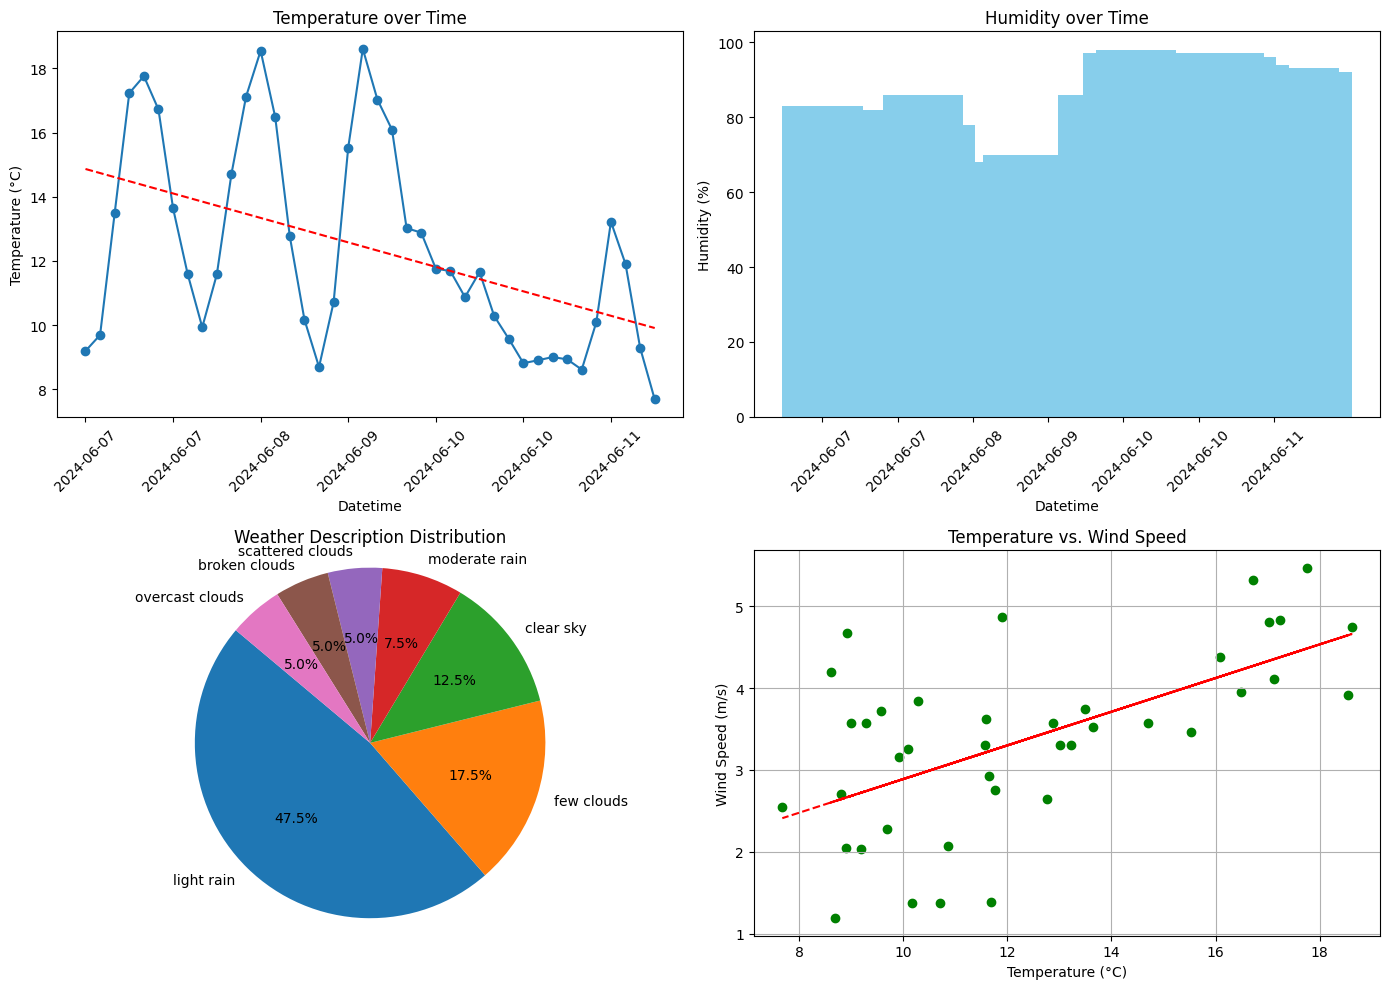

In [4]:
# Select every 6th datetime value for x-ticks
x_ticks = df['Datetime'][::6]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Line plot for Temperature over Time
axs[0, 0].plot(df['Datetime'], df['Temperature (C)'], marker='o')
axs[0, 0].set_title('Temperature over Time')
axs[0, 0].set_xlabel('Datetime')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].set_xticks(x_ticks)
axs[0, 0].tick_params(axis='x', rotation=45)

# Add line of best fit for Temperature over Time
s = np.polyfit(df['Datetime'].astype(np.int64) // 10**9, df['Temperature (C)'], 1)
p = np.poly1d(s)
axs[0, 0].plot(df['Datetime'], p(df['Datetime'].astype(np.int64) // 10**9), "r--")

# Plot 2: Bar plot for Humidity over Time
axs[0, 1].bar(df['Datetime'], df['Humidity (%)'], color='skyblue')
axs[0, 1].set_title('Humidity over Time')
axs[0, 1].set_xlabel('Datetime')
axs[0, 1].set_ylabel('Humidity (%)')
axs[0, 1].set_xticks(x_ticks)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Pie chart for Weather Description
weather_counts = df['Weather'].value_counts()
axs[1, 0].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Weather Description Distribution')
axs[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 4: Scatter plot for Temperature vs. Wind Speed
axs[1, 1].scatter(df['Temperature (C)'], df['Wind Speed (m/s)'], c='g', marker='o')
axs[1, 1].set_title('Temperature vs. Wind Speed')
axs[1, 1].set_xlabel('Temperature (°C)')
axs[1, 1].set_ylabel('Wind Speed (m/s)')
axs[1, 1].grid(True)

# Add line of best fit for Temperature vs. Wind Speed
s = np.polyfit(df['Temperature (C)'], df['Wind Speed (m/s)'], 1)
p = np.poly1d(s)
axs[1, 1].plot(df['Temperature (C)'], p(df['Temperature (C)']), "r--")

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Customising Subplots
Customising subplots can enhance their readability and presentation.

### Adding Annotations

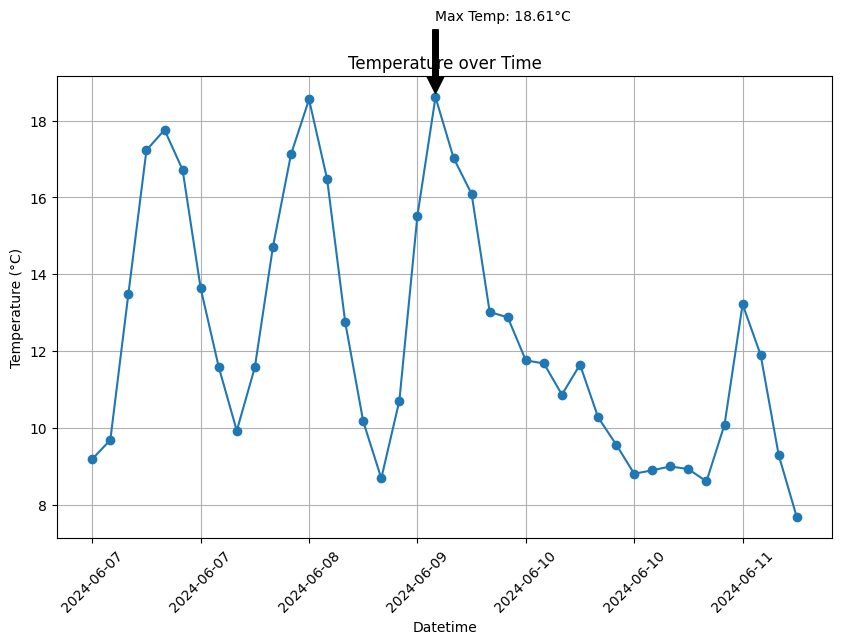

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Datetime'], df['Temperature (C)'], marker='o')
ax.set_title('Temperature over Time')
ax.set_xlabel('Datetime')
ax.set_ylabel('Temperature (°C)')
ax.set_xticks(x_ticks)
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

# Annotate the highest temperature
max_temp = df['Temperature (C)'].max()
max_temp_time = df.loc[df['Temperature (C)'] == max_temp, 'Datetime'].iloc[0]
ax.annotate(f'Max Temp: {max_temp:.2f}°C', xy=(max_temp_time, max_temp), 
             xytext=(max_temp_time, max_temp+2), 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Customising Colors and Styles

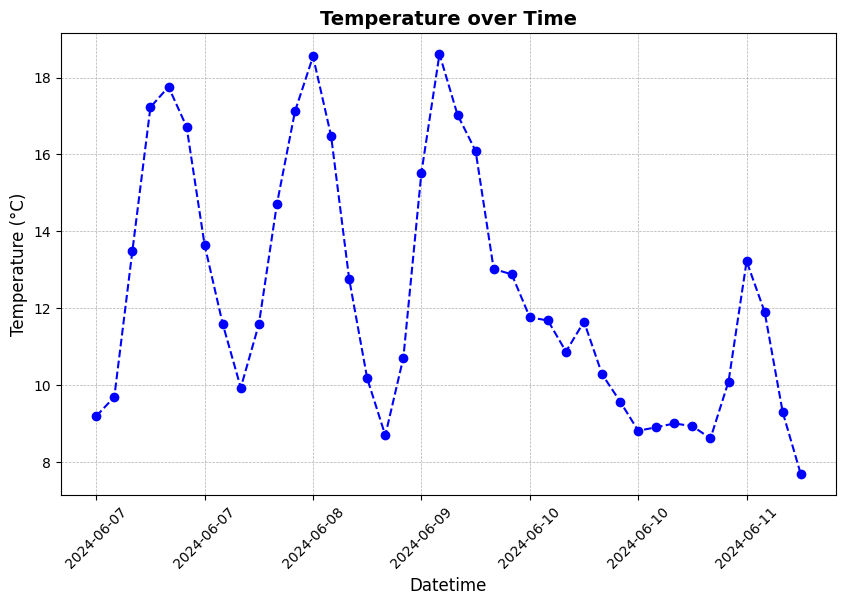

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Datetime'], df['Temperature (C)'], marker='o', linestyle='--', color='b')
ax.set_title('Temperature over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Datetime', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_xticks(x_ticks)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()

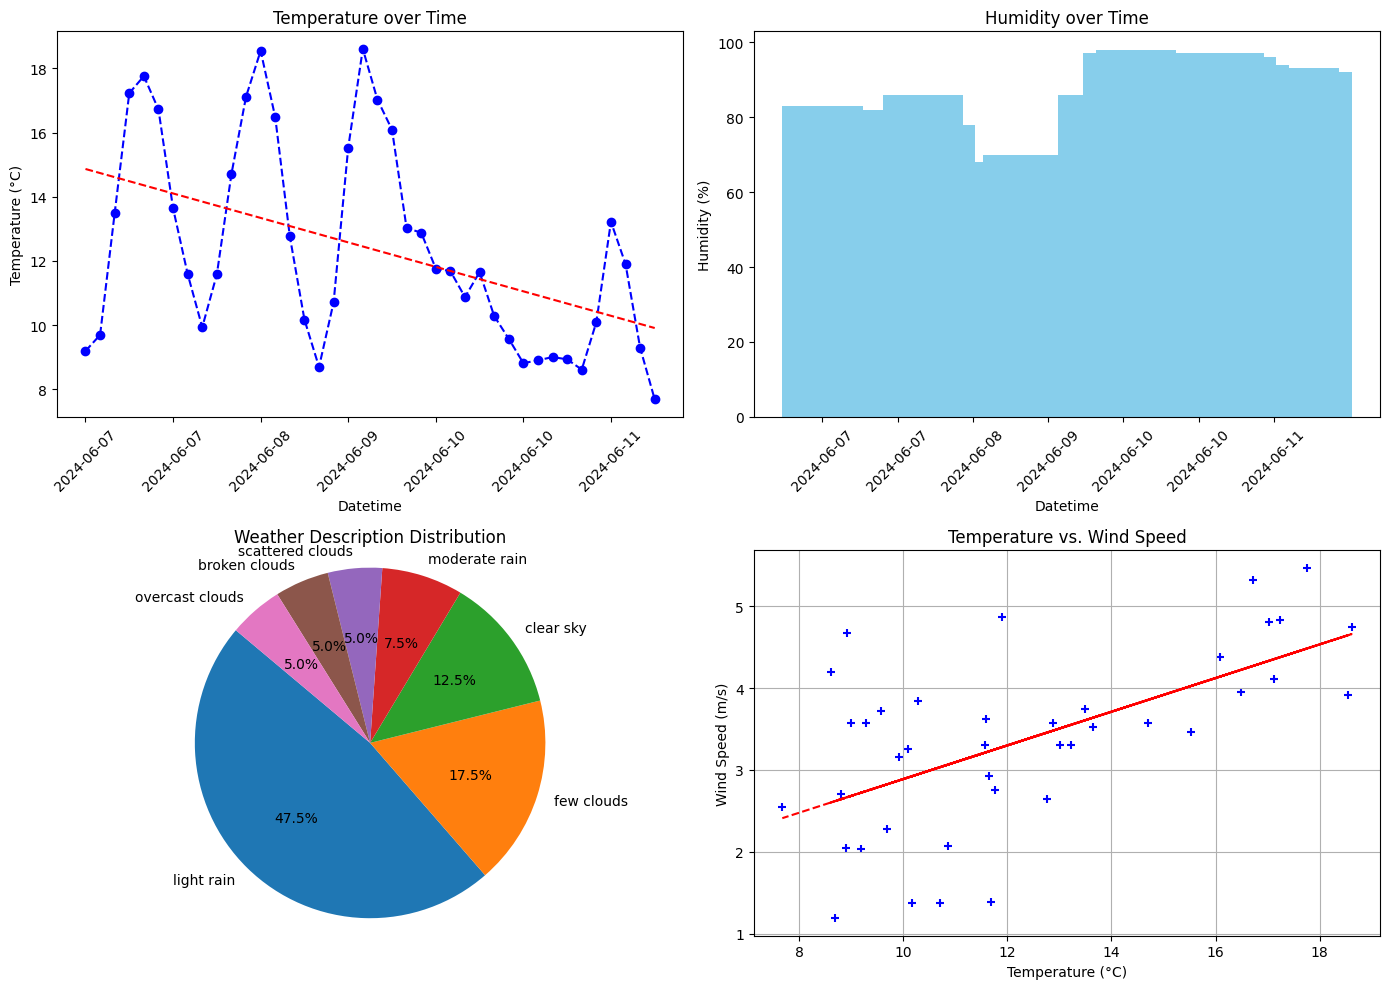

In [7]:
# Select every 6th datetime value for x-ticks
x_ticks = df['Datetime'][::6]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Line plot for Temperature over Time
axs[0, 0].plot(df['Datetime'], df['Temperature (C)'], marker='o', linestyle='--', color='b')
axs[0, 0].set_title('Temperature over Time')
axs[0, 0].set_xlabel('Datetime')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].set_xticks(x_ticks)
axs[0, 0].tick_params(axis='x', rotation=45)

# Add line of best fit for Temperature over Time
s = np.polyfit(df['Datetime'].astype(np.int64) // 10**9, df['Temperature (C)'], 1)
p = np.poly1d(s)
axs[0, 0].plot(df['Datetime'], p(df['Datetime'].astype(np.int64) // 10**9), "r--")

# Plot 2: Bar plot for Humidity over Time
axs[0, 1].bar(df['Datetime'], df['Humidity (%)'], color='skyblue')
axs[0, 1].set_title('Humidity over Time')
axs[0, 1].set_xlabel('Datetime')
axs[0, 1].set_ylabel('Humidity (%)')
axs[0, 1].set_xticks(x_ticks)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Pie chart for Weather Description
weather_counts = df['Weather'].value_counts()
axs[1, 0].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Weather Description Distribution')
axs[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 4: Scatter plot for Temperature vs. Wind Speed
axs[1, 1].scatter(df['Temperature (C)'], df['Wind Speed (m/s)'], c='b', marker='+')
axs[1, 1].set_title('Temperature vs. Wind Speed')
axs[1, 1].set_xlabel('Temperature (°C)')
axs[1, 1].set_ylabel('Wind Speed (m/s)')
axs[1, 1].grid(True)

# Add line of best fit for Temperature vs. Wind Speed
s = np.polyfit(df['Temperature (C)'], df['Wind Speed (m/s)'], 1)
p = np.poly1d(s)
axs[1, 1].plot(df['Temperature (C)'], p(df['Temperature (C)']), "r--")

# Adjust layout
plt.tight_layout()
plt.show()

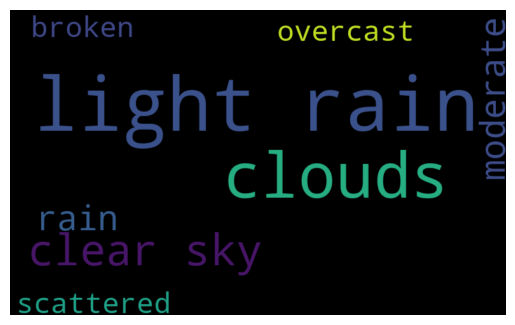

In [20]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
# text=("Python Python Python Matplotlib")
text = df['Weather'].tolist()
text = ' '.join(text)

# Create the wordcloud object
wordcloud = WordCloud(width=780, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Homework
- Create additional subplots to visualise other aspects of the weather data (e.g., wind speed, pressure).
- Experiment with different types of subplots and customisations to enhance the visualisations.

## Summary
In this session, we learned how to visualise weather data using advanced techniques in Matplotlib. We created subplots and grids, combined multiple plots into a single figure, and customised these plots for better presentation.